In [38]:
import numpy
import math
from matplotlib import pyplot
%matplotlib inline

In [39]:
x = numpy.arange(-5,5,0.1)
y = numpy.arange(-5,5,0.1)
X,Y = numpy.meshgrid(x,y)

In [40]:
def j_trans(z,c):
    j_trans = z + c**2/z
    return j_trans

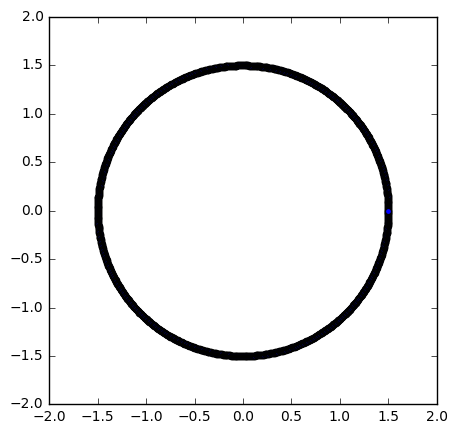

In [41]:
theta = numpy.linspace(0,2*math.pi,1000)
R = 1.5
x_circle = R*numpy.cos(theta)
y_circle = R*numpy.sin(theta)
pyplot.figure(figsize=(5,5))
pyplot.scatter(x_circle,y_circle)

In [44]:
z = x_circle + y_circle*1j

In [47]:
z_jtrans = j_trans(z,1)

In [50]:
z_real = z_jtrans.real
z_imag = z_jtrans.imag

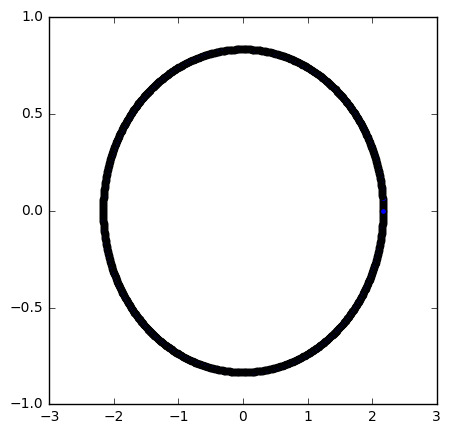

In [52]:
pyplot.figure(figsize = (5,5))
pyplot.scatter(z_real,z_imag)